<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#1. Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [29]:
#2. Generate Synthetic Linear Data (y = 2x + 3 + noise)
# Synthetic data is artificially generated data that mimics real-world data but is not collected from
# real-world events.
#seed helps to produce exact same data even if re-run
np.random.seed(42) #42 is a random no., commonly used in program, can use a different number

X = 2 * np.random.rand(100,1) # 100 random x values between 0 and 2
# 2 * to simulate data over a wider range.
# X = [[0.5], [1.2], [0.1]]

# Adds Gaussian noise (mean = 0, std = 1) → makes the data more realistic (not perfectly on a line).
# noise makes it look more real and challenging for the model.
y = 4 + 3 * X + np.random.randn(100,1)

print(X[45:50])
print(y[45:50])

[[1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]]
[[7.06574625]
 [7.27306077]
 [5.71855706]
 [7.86711877]
 [7.29958236]]


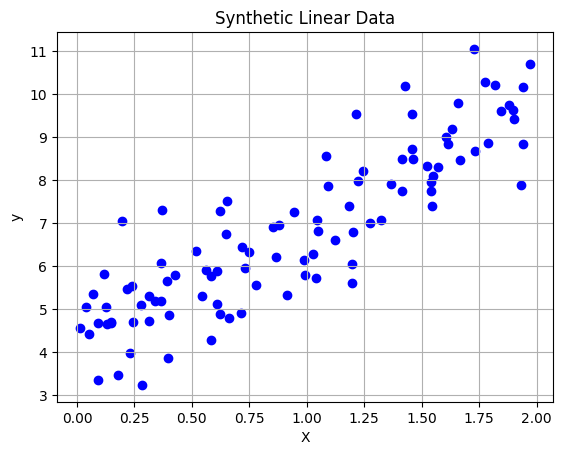

In [10]:
# 3. Visualize Data
plt.scatter(X,y,color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Linear Data')
plt.grid(True)
plt.show()

In [11]:
# 4. Define Cost Function (Mean Squared Error)
def cost_function(X,y,theta):
  m = len(y)
  #Theta has the value of the weight w and Bias b
  y_preds = X.dot(theta) #model's predicted values
  errors = y_preds - y   # difference between predictions and actual y

  # np.sum(errors ** 2) same thing numerically as as its a matrix of values
  cost_val = (1 / ( 2 * m ) ) * np.dot(errors.T, errors)  #its Matrix-based sum of squared errors

  return cost_val[0,0] #return scalar value

In [12]:
# 5. Implement Gradient Descent
#Purpose: Gradually adjust theta to make predictions better by moving in the direction
#that reduces the error (negative gradient).

#Only Here iterations and epochs are same as it is batch-gradient-descent
#Epoch:     One full pass through the entire dataset
#Iteration: One update of the model parameters

#In deep learning or mini-batch gradient descent:iterations = epochs × (dataset size / batch size)

def gradient_descent(X, y, theta, alpha, iterations ):
  m = len(X)
  cost_history = []
  for _ in range(iterations):
    gradients = (1/m)*(X.T.dot(X.dot(theta) - y))
    theta = theta - alpha * gradients
    cost_history.append(cost_function(X,y,theta))
  return theta, cost_history

In [13]:
# Add intercept term
# np.ones((len(X), 1)) → adds a column of 1s to represent the intercept term (θ₀)
X_b = np.c_[np.ones((len(X), 1)), X]  # Shape: (100, 2)

#Initializes theta randomly from a normal distribution
theta_init = np.random.randn(2, 1)  # shape: (2, 1)

alpha = 0.1  # learning rate

iterations = 100 #Number of times to update theta

In [30]:
# Run Gradient Descent
theta_final, cost_history = gradient_descent(X_b, y, theta_init, alpha, iterations)
print("Cost_history:")
print(cost_history)

Cost_history:
[np.float64(0.41717209346566975), np.float64(0.4167049772555888), np.float64(0.41625358154387343), np.float64(0.4158173772671696), np.float64(0.4153958531674131), np.float64(0.4149885151926045), np.float64(0.41459488591774873), np.float64(0.41421450398528586), np.float64(0.4138469235643491), np.float64(0.4134917138282269), np.float64(0.4131484584494053), np.float64(0.4128167551116075), np.float64(0.4124962150382548), np.float64(0.41218646253679647), np.float64(0.41188713455837495), np.float64(0.41159788027231103), np.float64(0.41131836065490823), np.float64(0.41104824809209634), np.float64(0.41078722599544804), np.float64(0.4105349884311177), np.float64(0.41029123976126874), np.float64(0.4100556942975668), np.float64(0.4098280759663371), np.float64(0.40960811798498775), np.float64(0.4093955625493256), np.float64(0.4091901605313928), np.float64(0.40899167118747465), np.float64(0.40879986187593254), np.float64(0.4086145077845337), np.float64(0.4084353916669582), np.float64(

In [15]:
print("Learned Parameters (theta):")
print(theta_final)

Learned Parameters (theta):
[[3.90668931]
 [3.04241987]]


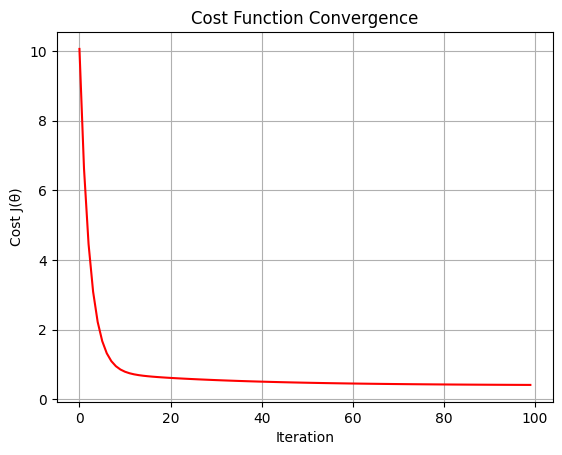

In [16]:
# 6. Plot Cost History
plt.plot(range(iterations), cost_history, color='red')
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()

#The curve is steep in the beginning and then flattens out, showing that:
#-The cost is reducing quickly in the early iterations.
#-Then, it converges as gradient descent finds the optimal parameters 𝜃

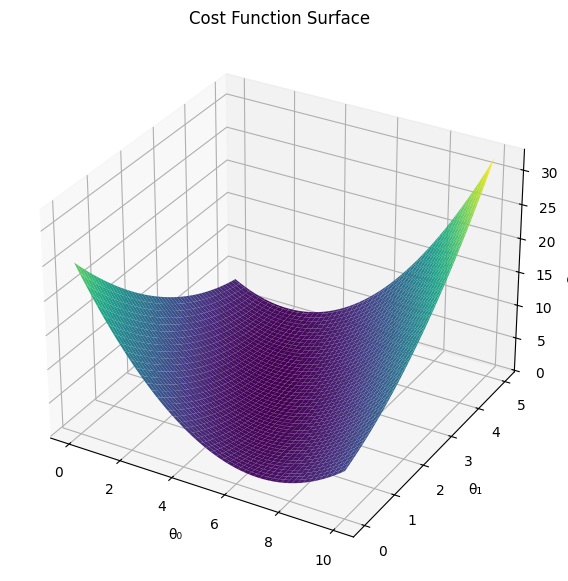

In [18]:
# 7. Plot 3D Cost Function Surface
theta0_vals = np.linspace(0, 10, 100)
theta1_vals = np.linspace(0, 5, 100)
J_vals = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[j, i] = cost_function(X_b, y, t)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.set_xlabel('θ₀')
ax.set_ylabel('θ₁')
ax.set_zlabel('Cost J(θ)')
plt.title("Cost Function Surface")
plt.show()

In [19]:
# 8. Predict New Values
X_new = np.array([[1], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta_final)

print("Predictions for x = 1 and 2:")
print(y_pred)

Predictions for x = 1 and 2:
[[6.94910918]
 [9.99152905]]


In [20]:
# 9. Compare with scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Scikit-learn Parameters:")
print(np.c_[lin_reg.intercept_, lin_reg.coef_])

Scikit-learn Parameters:
[[4.21509616 2.77011339]]
